https://colab.research.google.com/drive/1ZYeebj9e1Gs3BaJzR82LqclLKls5-mTx
# **Lab4 : Function Approximation**
**Patrik Svensson**

# **Abstract**

This lab will explore the area of function approximations. There are many different methods to accomplish this, but in this report we will mainly focus on $L_2$ projections. The result was an implementation in Python together with a visual test that shows the graph of an approximated function.

# **Set up environment**

To set up the environment, run the two following lines of code.

In [0]:
import numpy as np
import unittest
import math
import matplotlib.pyplot as plt
plt.style.use('classic')
import scipy.integrate as integrate

# **Introduction**

Sometimes it is not feasible to use a function, one reason to this could be that it is too slow to compute the function. To mitigate this, it is possible to do an approximation of the function instead.


# **Methods**


##  L2 Projection in 1D
According to (9.13) in the lecture notes, the formula:

$P_hf(x) = \sum_{j=0}^{m+1}\alpha_j\phi_j(x)$

This formula is used for $L^2$ projection of a function $f$ belonging to $L^2(I)$ onto a space of continuous piecewise linear polynomials $V_h^{(1)}$, in which $I$ is an interval with $m$ nodes. $\phi(x)$ (by 9.7 in lecture notes) and $f(x)$ are known, the only thing we need to compute is the $a$. We can compute the $\alpha$ from the following linear equation:

$A\alpha = b$

Where $A$ is the mass matrix, and each element are given by $a_{ij} = (\phi_j, \phi_i)$. $b$ is the load vector, and each element is given by $b_i = (f,\phi_i)$. $\alpha$ is called the solution vector. 

According to the lecture notes (9.14):

$a_{ii} = \frac{h_i}{3} + \frac{h_{i + 1}}{3}$

According to lecture notes (9.15):

$a_{ii+1} = \frac{h_{i+1}}{6}$

Accoding to lecture notes (9.16):

$a_{ii-1} = \frac{h_i}{6}$

Accoding to lecture notes (9.17):

$b_i = (f,\phi_i) = \int_{0}^{1} f(x)\phi_i(x)dx$ which can be further expanded to:
$b_i = f(x_i)(\frac{h_i}{2} + \frac{h_{i+1}}{2})$ according to (1.74) in *The Finite Element Method: Theory, Implementation, and Practice* by Mats G. Larsson, Fredrik Bengzon.

To calculate the approximation of the function that we approximated with $L_2$ projection:

$P_hf(x) = \sum_{j=0}^{m+1}\alpha_j\phi_j(x)$

We can plug in the $\alpha$ values that we have obtained. The $\phi(x)$ values can be obtained from (9.7) in the lecture notes.

$\phi_i(x) = \lambda_{k,1}(x)$ if $x \in I_k$

$\phi_i(x) = \lambda_{k+1,0}(x)$ if $x \in I_{k + 1}$

$\phi_i(x) = 0$ if $x \neq I_k \cup I_{k + 1}$

$\lambda_{k,1}(x) = \frac{x - x_{k-1}}{h_k}$

$\lambda_{k+1,0}(x) = \frac{x_{k + 1} - x}{h_{k + 1}}$

In [0]:
def L2Projection1D(function, mesh):
  n = mesh.shape[0]
  A = np.zeros((n, n))
  b = np.zeros(n)

  for i in range(n):
    if(i == (n - 1)):
      h = abs(mesh[i] - mesh[i - 1])
      A[i][i] += h / 3
      A[i][i-1] += h / 6
    elif (i == 0):
      h_1 = abs(mesh[i] - mesh[i + 1])
      A[i][i] += h_1 / 3
      A[i][i + 1] += h_1 / 6
    else:
      h = abs(mesh[i] - mesh[i - 1])
      h_1 = abs(mesh[i] - mesh[i + 1])
      A[i][i] += h / 3 + h_1 / 3
      A[i][i + 1] += h_1 / 6
      A[i][i - 1] += h / 6

    interval_size = 0
    function_val = function(mesh[i])
    if(i == (n - 1)):
      interval_size = abs(mesh[i] - mesh[i-1]) / 2
    elif (i == 0):
      interval_size = abs(mesh[i] - mesh[i + 1]) / 2
    else:
      interval_size = abs(mesh[i] - mesh[i-1]) / 2 + abs(mesh[i] - mesh[i + 1]) / 2

    b[i] = interval_size * function_val

  # Compute alphas
  x = np.linalg.solve(A, b)

  return x
  

The code below is a test of the implementation by plotting the graph of $x^2$ and the graph of the approximation of the function.

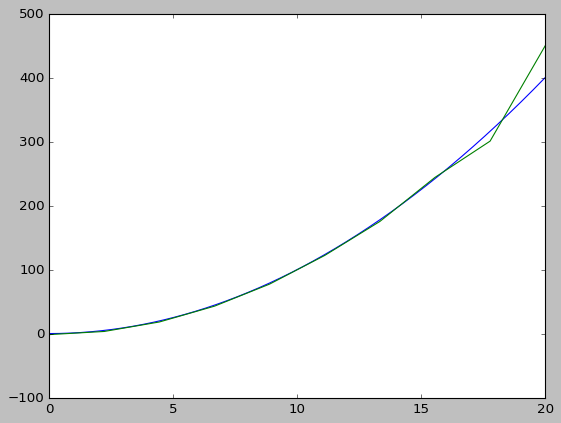

In [118]:
x = np.linspace(0,20,1000)
mesh = np.linspace(0, 20, 10)
function = lambda x:x**2 
alphas = L2Projection1D(function, mesh)

plt.plot(x, function(x))
plt.plot(mesh, alphas)

plt.show()

The next graph is to show the error convergence. The test plots the approximation errors based mesh sizes of: 10, 50, 100, 500, and 1000. 

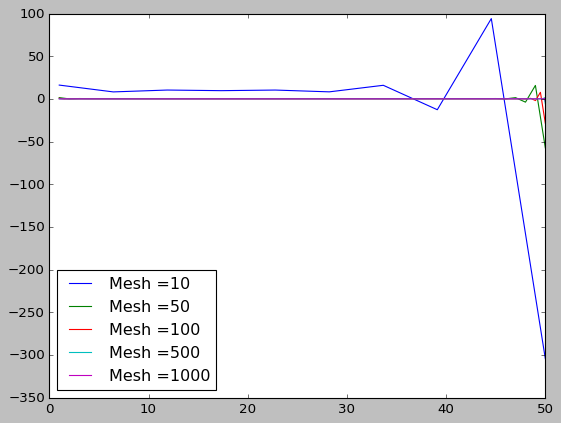

In [119]:

test_mesh_sizes = [10, 50, 100, 500, 1000]
for i in range(len(test_mesh_sizes)):
  test_mesh = np.linspace(1, 50, test_mesh_sizes[i])
  function = lambda x:x**2  
  alphas = L2Projection1D(function, test_mesh)
  mapped = map(function, test_mesh) 
  plt.plot(test_mesh, function(test_mesh) - alphas, label='Mesh =' + str(test_mesh_sizes[i])) 
  plt.legend(loc='lower left')

plt.show()

# **Results**
The results of the implemetation can be seen in the graph in the previous section. It is easy to see that the mesh array with most elements produces the most accurate approximations.

# **Discussion**
The algorithm implemented and lecture was one of the hardest assignment. But after much struggeling, I think I managed to get it right. One thing that I noticed is that by the final elements of the mesh, there's always a bigger error than in the rest of the graph. This could possibly occur due to that it's the rightmost position on the interval. This might give us a less good value for $b$ at this point, like when calulating the final $b$ we use $abs(mesh[i] - mesh[i-1]) / 2$. But when calculating $b$ corresponding to a interval that is not on the edge, we use $abs(mesh[i] - mesh[i-1]) / 2 + abs(mesh[i] - mesh[i + 1]) / 2$. This could possibly create this error.